# The Basics

## Dummy dataset

Let's start first with a dummy dataset based on the [UCI credit card](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) dataset.

In [1]:
from skorecard.datasets import load_uci_credit_card

X, y = load_uci_credit_card(return_X_y=True)
X.head(4)

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,1,2,400000.0,201800.0
1,2,2,80000.0,80610.0
2,1,2,500000.0,499452.0
3,1,1,140000.0,450.0


## A basic bucketer

`skorecard` offers a [set of bucketers](../api/bucketers/OptimalBucketer.md) that have a scikit-learn compatible interface. By default they will bucket all variables into `n_bins` buckets.

Some bucketers like [OptimalBucketer](../api/bucketers/OptimalBucketer.md) and [DecisionTreeBucketer](../api/bucketers/DecisionTreeBucketer.md) are supervised and can use information from `y` to find good buckets. You can control the numbers of buckets using `max_n_bins` instead of `n_bins`. 

In [2]:
from skorecard.bucketers import DecisionTreeBucketer

bucketer = DecisionTreeBucketer(max_n_bins=10)
X_transformed = bucketer.fit_transform(X, y)
X_transformed.head(4)

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,0,1,9,9
1,1,1,3,7
2,0,1,9,9
3,0,0,5,0


In [3]:
X_transformed["BILL_AMT1"].value_counts().sort_index()

0    1343
1     404
2     574
3     462
4     400
5     359
6     857
7     789
8     500
9     312
Name: BILL_AMT1, dtype: int64

## Bucketing specific variables

Instead of applying a bucketer on all features, you'll likely want to apply it only to specific features. You can use the `variables` parameter for that:

In [4]:
bucketer = DecisionTreeBucketer(max_n_bins=10, variables=["BILL_AMT1"])
bucketer.fit_transform(X, y).head(4)

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,1,2,400000.0,9
1,2,2,80000.0,7
2,1,2,500000.0,9
3,1,1,140000.0,0


## Inspecting bucketing results

`skorecard` bucketers have some methods to help you inspect the result of the bucketing process:

In [5]:
from skorecard.bucketers import EqualWidthBucketer

bucketer = EqualWidthBucketer(n_bins=5, variables=["BILL_AMT1"])
bucketer.fit(X, y)
bucketer.bucket_table("BILL_AMT1")

,bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV
0,-1,Missing,0.0,0.00,0.0,0.0,NaN,0.000,0.000
1,0,"(-inf, -10319.399999999994]",3.0,0.05,3.0,0.0,0.000000,4.181,-0.003
2,1,"(-10319.399999999994, 144941.2]",5408.0,90.13,4188.0,1220.0,0.225592,-0.008,-0.000
3,2,"(144941.2, 300201.80000000005]",490.0,8.17,395.0,95.0,0.193878,0.183,-0.003
4,3,"(300201.80000000005, 455462.4]",75.0,1.25,55.0,20.0,0.266667,-0.230,-0.001
5,4,"(455462.4, inf]",24.0,0.40,14.0,10.0,0.416667,-0.903,-0.004


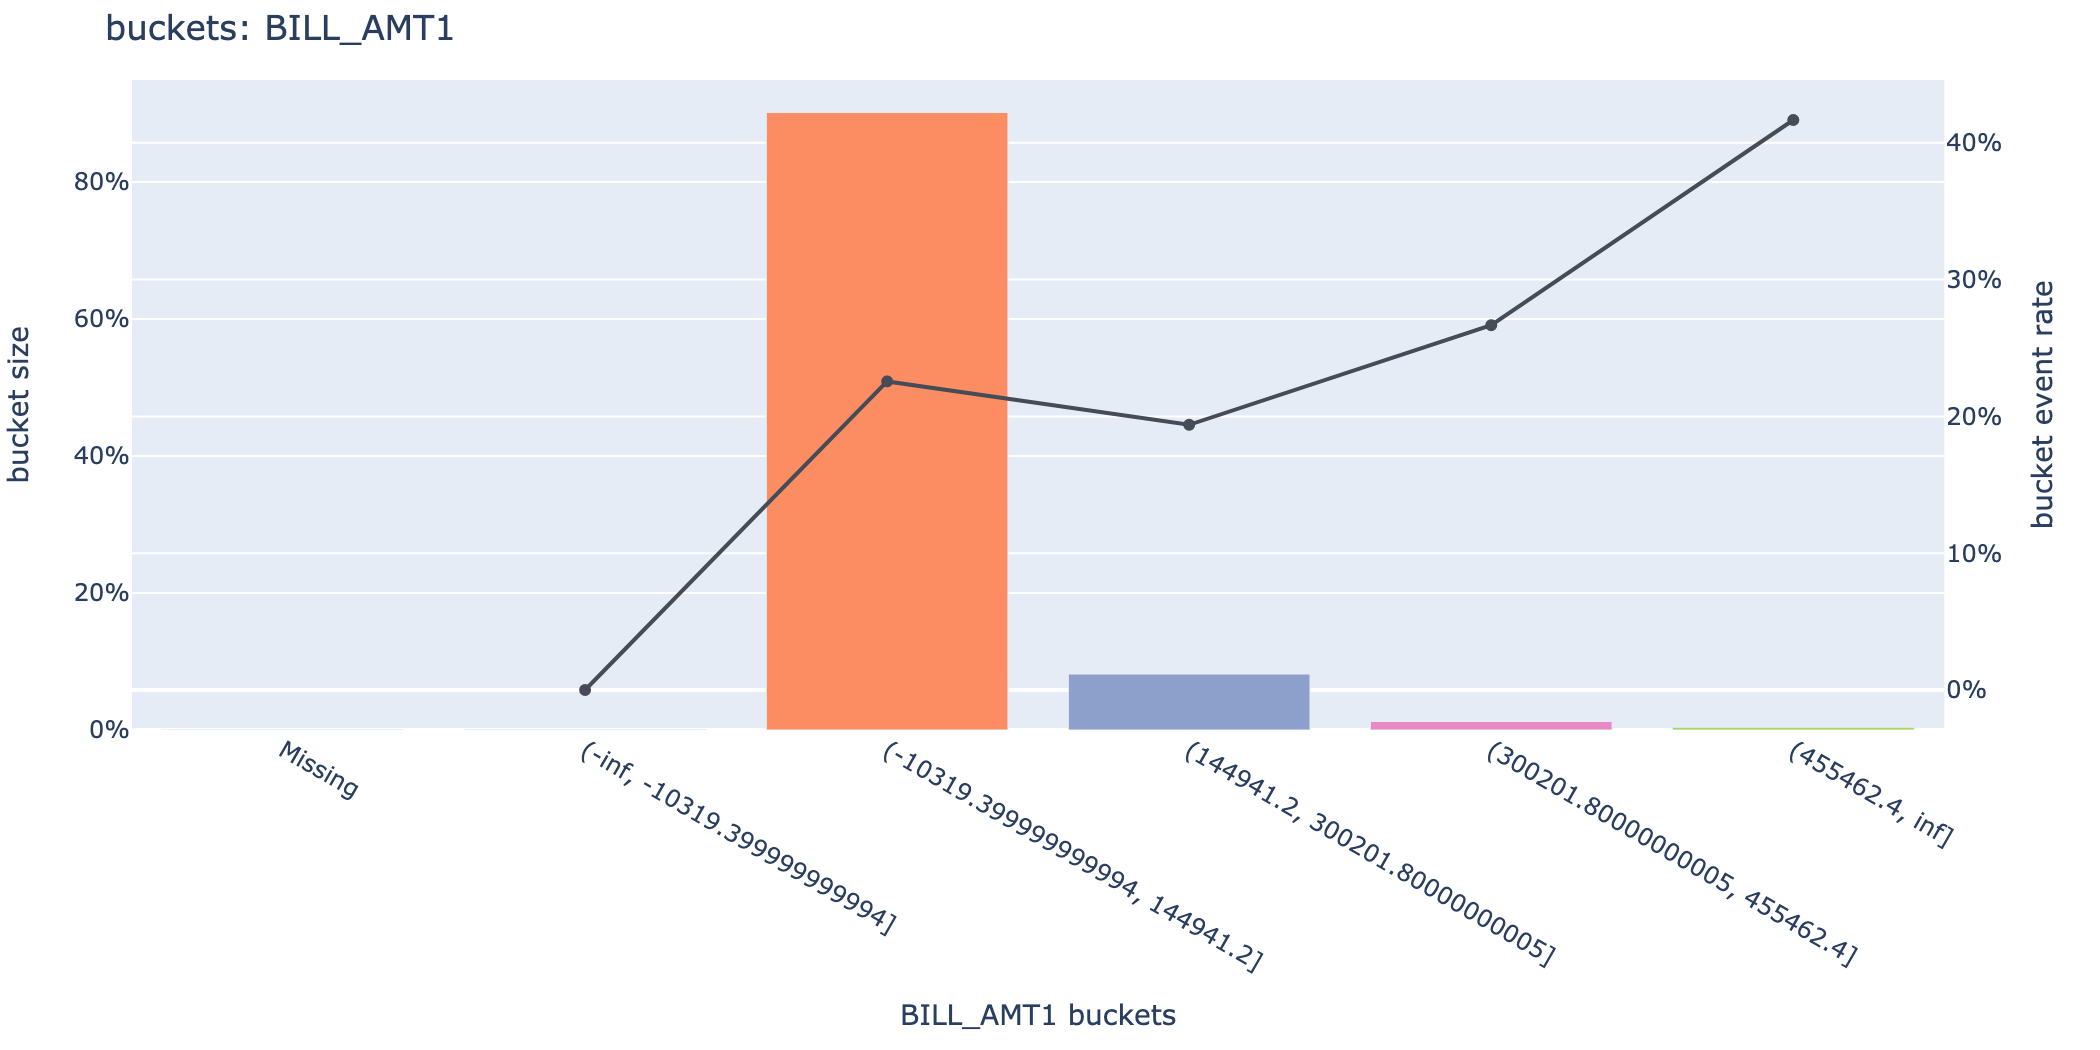

In [6]:
bucketer.plot_bucket(
    "BILL_AMT1", format="png", scale=2, width=1050, height=525
)  # remove format argument for an interactive plotly plot.